In [ ]:
Refer below links for ml support and learning

# fill missing values ,outlier detection


http://colingorrie.github.io/outlier-detection.html

In [79]:
#z-score

import numpy as np


y=[1,2,3,4,5,6,7,8,9]+[1085434567,987654]
ys=np.array(y)
#outliers_z_score()
threshold = 3

mean_y = np.mean(ys)
print(mean_y)
stdev_y = np.std(ys)
print(stdev_y)
z_scores = [(y - mean_y) / stdev_y for y in ys]
[i for i in ys if ((i- mean_y) / stdev_y)>threshold]



98765660.5455
312012231.981


[1085434567]

In [80]:
#Modified Z-score method
#Another drawback of the Z-score method is that it behaves strangely in small datasets – in fact, the Z-score method will never detect an outlier if the dataset has fewer than 12 items in it. This motivated the development of a modified Z-score method, which does not suffer from the same limitation.2

import numpy as np


threshold = 3.5

median_y = np.median(ys)
median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
modified_z_scores = [(y - median_y) / median_absolute_deviation_y for y in ys]
ys[np.abs(modified_z_scores) > threshold]


array([1085434567,     987654])

In [81]:
##IQR
quartile_1, quartile_3 = np.percentile(ys, [25, 75])
print(quartile_1,quartile_3)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
ys[(ys > upper_bound) | (ys < lower_bound)]

3.5 8.5


array([1085434567,     987654])

In [ ]:
#preprocessing data

Rescale data
Standardize data
Normalize data
Binarize data



# Rescale data


In [25]:
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url,names=names)
array = dataframe.values
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
X

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [11]:
scaler = MinMaxScaler(feature_range=(4, 11))
rescaledX = scaler.fit_transform(X)
# summarize transformed data

print(rescaledX)
#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually such that it is in the given range on the training set, 
#i.e. between zero and one.
##min,max=feature range
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

[[  6.47058824   9.20603015   8.13114754 ...,   7.5052161    5.64090521
    7.38333333]
 [  4.41176471   6.98994975   7.78688525 ...,   6.77496274   4.81596926
    5.16666667]
 [  7.29411765  10.43718593   7.67213115 ...,   6.43070045   5.77540564
    5.28333333]
 ..., 
 [  6.05882353   8.25628141   8.13114754 ...,   6.73323398   4.49914603
    5.05      ]
 [  4.41176471   8.4321608    7.44262295 ...,   7.14008942   4.80999146
    7.03333333]
 [  4.41176471   7.27135678   8.01639344 ...,   7.17138599   4.70836892
    4.23333333]]


# Standardize data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(normalizedX)




In [31]:
rescaledX = scaler.transform(normalizedX)
# summarize transformed data
numpy.set_printoptions(precision=5)
print(rescaledX[0:5,:])

[[  5.20815e-01   8.98555e-01  -1.12693e-03   9.04313e-01  -9.42579e-01
    1.60888e-02   4.18945e-01   1.04057e+00]
 [ -6.79052e-01   2.05743e-01   9.99053e-01   1.42952e+00  -9.42579e-01
    5.87189e-01   1.29834e-01   8.12362e-01]
 [  8.47675e-01   1.49753e+00  -5.19277e-01  -1.21193e+00  -9.42579e-01
   -1.09241e+00   3.59577e-01  -4.18398e-01]
 [ -7.65574e-01  -5.86337e-01   2.19075e-01   4.32387e-01   8.94359e-01
   -1.69960e-02  -8.45078e-01  -6.99515e-01]
 [ -1.08129e+00  -5.37170e-01  -1.49140e+00   4.35476e-01   1.21890e+00
    1.18115e-02   3.81518e+00  -6.40133e-01]]


In [ ]:
#inverse
xin=scaler.inverse_transform(normalizedX)
#xi=inverse_transform(X, copy=None)

In [33]:
mean=scaler.mean_
mean

array([ 0.02265,  0.6829 ,  0.4028 ,  0.11209,  0.31892,  0.18687,
        0.00271,  0.19543])

In [ ]:
#StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
 #removes the mean and scales the data to unit variance
    
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution 
is now centred around 0, with a standard deviation of 1.

work column wise

In [35]:
scaler.std_

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


array([ 0.02094,  0.16106,  0.15333,  0.09249,  0.33835,  0.06336,
        0.0019 ,  0.08089])

In [ ]:
As StandardScaler, MinMaxScaler is very sensitive to the presence of outliers.

better to use standard scaler after normalization.

# Normalize data

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=5)
print(normalizedX[0:5,:])

[[ 0.03355  0.82763  0.40263  0.19572  0.       0.18789  0.00351  0.2796 ]
 [ 0.00842  0.71604  0.55598  0.2443   0.       0.22408  0.00296  0.26114]
 [ 0.0404   0.9241   0.32318  0.       0.       0.11766  0.00339  0.16159]
 [ 0.00661  0.58847  0.43639  0.15208  0.62153  0.1858   0.0011   0.13885]
 [ 0.       0.59639  0.17413  0.15236  0.73134  0.18762  0.00996  0.14366]]


# Binarize Data (Make Binary)

In [6]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=40).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[ 0.  1.  1.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.]]


# impute missing values

In [37]:
>>> from sklearn.preprocessing import Imputer 
>>> imp = Imputer(missing_values=10, strategy='mean', axis=0) 
>>> imp.fit_transform(X)

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

# generating polynomial feature

In [36]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly = PolynomialFeatures(5) 
x=[[1,1,1,0,0]]
>>> poly.fit_transform(x)

array([[ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.

# Convert strings categorical names to integers

# Label encoder

In [ ]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder() 
y = enc.fit_transform(y)
#Convert Nominal Categorical Data Into Dummy (OneHot) Features Using Scikit

integerized_data = preprocessing.LabelEncoder().fit_transform(df["city"])

# View data
integerized_data

# all data
from sklearn import preprocessing
for c in df.columns:
    le=preprocessing.LabelEncoder().fit(df[c])
    df[c] =le.transform(df[c])

# View data
df.head()

# inverse
le.fit(classes)

target=le.transform(classes)
result=le.inverse_transform(YDT1)

# OneHotEncoder

In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
['cold']


# classification metrics

In [ ]:
#Accuracy 
>>> knn.score(X_test, y_test) 
>>> from sklearn.metrics import accuracy_score 
>>> accuracy_score(y_test, y_pred) 
#Classification Report
>>> from sklearn.metrics import classification_report 
>>> print(classification_report(y_test, y_pred))  
#Confusion Matrix 
>>> from sklearn.metrics import confusion_matrix


In [ ]:
#Confusion Matrix 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

In [3]:
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 2]
>>> y_pred = [0, 0, 2, 2, 1]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



#In words (keep an eye on the illustration):

#Precision is to measure the quality of our predictions only based on what our predictor claims to be positive (regardless of all it might miss):

#All we predicted correctly/All we predicted, correctly or wrongly

#However, Recall is to measure such quality with respect to the mistakes we did (what should have been predicted as positive but we flagged as negative ):

#All we predicted correctly/All we should have predicted

#Example. (Why Recall is important) Suppose we have a weather forecasting device; to predict rainy days. If this device has a high precision, it means when it says “it is going to rain”, we can trust it. But this doesn’t give us any information about all the times it says “it is not going to rain”! If the false claims is going to be costly for our business, then we might want to ask about the number of times this device misses a rainy day.

From these scenarios, every outcome of analysis of a movie review will have 4 states :

True Positive : Your system took a shoe and designated it as nike. This shoe is in fact nike, so the system was correct.
False Positive : Your system took a shoe and designated it as nike. But, the shoe was in fact NOT nike, so the system was wrong.
False Negative : Your system took a shoe and designated it as NOT nike. But, the shoe was in fact nike, so the system was wrong.
True Negative : Your system took a shoe and designated it as NOT nike. This shoe was in fact NOT nike, so the system was correct.
Now, here is where precision and recall come in :

Precision : Of the number of shoes selected, what percentage of them did the system classify correctly ?
Recall : Of the number of shoes classified correctly, what percentage of them have we selected?
This allows us to deduce the formulae :

Precision(P) = TP / (TP + FP)
Recall (R) = TP / (TP + FN) 
So, Precision and recall are somewhat opposites. When you try to increase R, P tends to decrease and vice versa.

This is quite accurate in determining the accuracy of a system. But, when we want to compare different systems, the comparison of Precision and Recall (2 values) is annoying. So, you can compute a single measure from this, called F-measure.

F-measure is the weighted harmonic mean of Precision and Recall
The F1 score is a measure of a model’s performance. It is a weighted average of the precision and recall of a model, with results tending to 1 being the best, and those tending to 0 being the worst. You would use it in classification tests where true negatives don’t matter much.
So,

F = 1/((a)(1/P) + (1-a)(1/R))

where a is a factor that determines the importance of Recall over Precision or vice versa. But, if we want to give equal importance to both measures, then we can take

a = 1/2

and we get what is know as a balanced F-measure

F =2 PR/(P+R)

https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

	
Abbreviations
AUC = Area Under the Curve.
AUROC = Area Under the Receiver Operating Characteristic curve.
AUC is used most of the time to mean AUROC, which is a bad practice since as Marc Claesen pointed out AUC is ambiguous (could be any curve) while AUROC is not.

Interpreting the AUROC
The AUROC has several equivalent interpretations:


The expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative.
The expected proportion of positives ranked before a uniformly drawn random negative.
The expected true positive rate if the ranking is split just before a uniformly drawn random negative.
The expected proportion of negatives ranked after a uniformly drawn random positive.
The expected false positive rate if the ranking is split just after a uniformly drawn random positive.

Computing the AUROC
Assume we have a probabilistic, binary classifier such as logistic regression.

Before presenting the ROC curve (= Receiver Operating Characteristic curve), the concept of confusion matrix must be understood. When we make a binary prediction, there can be 4 types of outcomes:

True positive rate (TPR), aka. sensitivity, hit rate, and recall, which is defined as TP/TP+FN(RECALL). Intuitively this metric corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. In other words, the higher TPR, the fewer positive data points we will miss.


False positive rate (FPR), aka. fall-out, which is defined as FP/TN+FP. Intuitively this metric corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. In other words, the higher FPR, the more negative data points we will missclassified.


To combine the FPR and the TPR into one single metric, we first compute the two former metrics with many different threshold (for example 0.00;0.01,0.02,…,1.000.00;0.01,0.02,…,1.00) for the logistic regression, then plot them on a single graph, with the FPR values on the abscissa and the TPR values on the ordinate. The resulting curve is called ROC curve, and the metric we consider is the AUC of this curve, which we call AUROC.

enter image description here
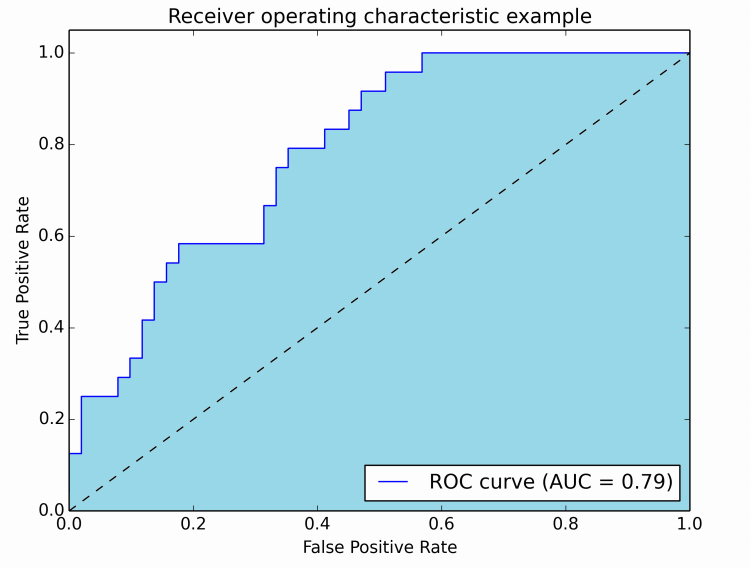
In this figure, the blue area corresponds to the Area Under the curve of the Receiver Operating Characteristic (AUROC). The dashed line in the diagonal we present the ROC curve of a random predictor: it has an AUROC of 0.5. The random predictor is commonly used as a baseline to see whether the model is useful.

16
down vote
AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best.

An example of its application are ROC curves. Here, the true positive rates are plotted against false positive rates. An example is below. The closer AUC for a model comes to 1, the better it is. So models with higher AUCs are preferred over those with lower AUCs.

# clustering metric

In [ ]:
for k in range (1, 11):
 
        # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same
        # results each time.
        kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
 
        # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
        labels = kmeans_model.labels_
        
	    # Sum of distances of samples to their closest cluster center
	    interia = kmeans_model.inertia_
        print "k:",k, " cost:", interia

# #Regression Metrics  

In [2]:


#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error 

 
print (mean_absolute_error(Y, YLR))

#Mean Squared Error 
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(Y, YLR))


#R² Score
from sklearn.metrics import r2_score 
print(r2_score(Y, YLR))


NameError: name 'Y' is not defined

# Mean Absolute Error



The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

# 2. Mean Squared Error


The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [ ]:

# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

# 3. R^2 Metric


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())


In [ ]:
# pca 

# #Clustering Metrics   

In [ ]:

#Adjusted Rand Index 
>>> from sklearn.metrics import adjusted_rand_score 
>>> adjusted_rand_score(y_true, y_pred)    

#Homogeneity 
>>> from sklearn.metrics import homogeneity_score 

>>> homogeneity_score(y_true, y_pred)   
#V-measure 
>>> from sklearn.metrics import v_measure_score 
>>> metrics.v_measure_score(y_true, y_pred) 